<a href="https://colab.research.google.com/github/AnitaTasnim/image_processing/blob/main/MRI_Brain_tumor_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#finding the MRI brain tumor detection dataset

https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


#import packages

In [35]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import glob #travel in directories and get all files with necessary extension
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2 # for image processing

import random
import sys

#Reading images

In [36]:
tumor  = []
path = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/yes/*.jpg'

for f in glob.iglob(path):
  img = cv2.imread(f)
  img = cv2.resize(img,(128,128))
  b,g,r = cv2.split(img)
  img = cv2.merge([r,g,b])
  tumor.append(img)






In [37]:
healthy  = []
path = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/no/*.jpg'


for f in glob.iglob(path):
  img = cv2.imread(f)
  img = cv2.resize(img,(128,128))
  b,g,r = cv2.split(img)
  img = cv2.merge([r,g,b])
  healthy.append(img)



In [38]:
#convert all of these lists into numpy arrays
healthy  = np.array(healthy)
tumor = np.array(tumor)

tumor.shape

(86, 128, 128, 3)

In [39]:
ALL  =  np.concatenate((healthy,tumor))
ALL.shape

(171, 128, 128, 3)

In [40]:
np.random.choice(10,5)

array([0, 8, 0, 8, 5])

In [41]:

np.random.choice(10,5,replace=False)#will not repeat  numbrs


array([3, 0, 1, 2, 8])

#visualizing Brain MRI images

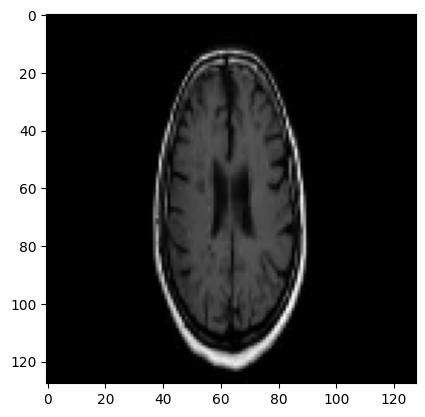

In [42]:
plt.imshow(healthy[0])

In [43]:
def plot_random(healthy,tumor,num=5):

  healthy_imgs = healthy[np.random.choice(healthy.shape[0],num,replace=False)]#will not repeat  numbrs
  tumor_imgs = tumor[np.random.choice(tumor.shape[0],num,replace=False)]#will not repeat  numbrs
  plt.figure(figsize=(16,9))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title('healthy')
    plt.imshow(healthy_imgs[i])

  plt.figure(figsize=(16,9))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title('tumor')
    plt.imshow(tumor_imgs[i])


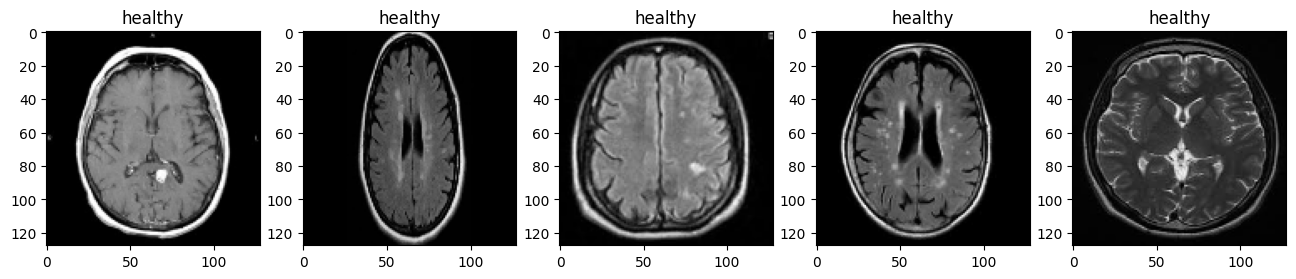

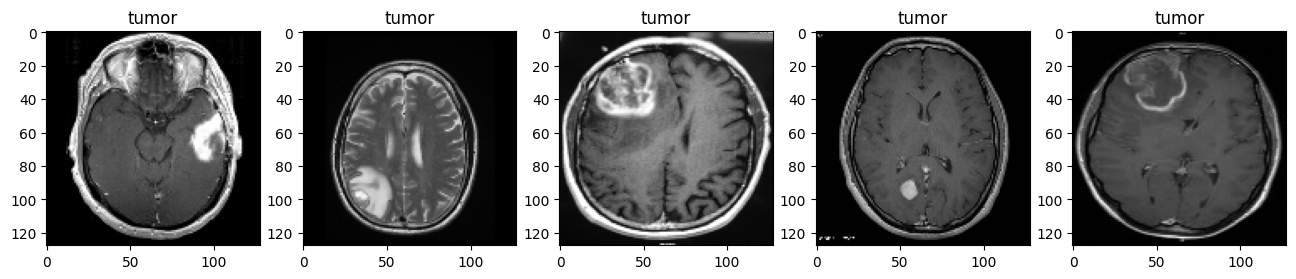

In [44]:
plot_random(healthy,tumor)

#Create Torch dataset Class

when you load a dataset into memory and represent it using a Python object, the entire dataset can indeed behave like an object. By implementing dunder methods such as __len__, __getitem__, and __iter__, you can make your dataset object act as if it were a collection or container of individual data samples (e.g., image

In [45]:
class Dataset(object):
  def __getitem__(self,index):
    raise NotImplementedError
  def __len__(self):
    raise NotImplementedError
  def __add__(self,other):
    return ConcatDataset([self,other])

#Creating MRI custom dataset class

In [46]:
'''class MRI(Dataset):
  def __init__(self,images, labels):
    self.images = images
    self.labels = labels

'''

class MRI(Dataset):
  def __init__(self):

    tumor  = []
    healthy = []
    path_T = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/yes/*.jpg'
    path_H = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/no/*.jpg'

    for f in glob.iglob(path_T):
      img = cv2.imread(f)
      img = cv2.resize(img,(128,128))
      b,g,r = cv2.split(img)
      img = cv2.merge([r,g,b])
      tumor.append(img)


    for f in glob.iglob(path_H):
      img = cv2.imread(f)
      img = cv2.resize(img,(128,128))
      b,g,r = cv2.split(img)
      img = cv2.merge([r,g,b])
      healthy.append(img)


    #our images
    tumor = np.array(tumor,dtype = np.float32)
    healthy = np.array(healthy,dtype = np.float32)
    #our lables
    tumor_label = np.ones(tumor.shape[0],dtype = np.float32)
    healthy_label = np.zeros(healthy.shape[0], dtype = np.float32)

    #concatenate
    self.images = np.concatenate((tumor,healthy)) #axis = 0, means concatenate them across first axis     # (100,512,512,3) (200,512,512,3)

    self.labels =  np.concatenate((tumor_label,healthy_label))

  def __len__(self):
    return self.images.shape[0]

  def __getitem__(self,index): #it receives the index and return the data correspond to that index

    sample = {'image': self.images[index], 'label': self.labels[index]}
    return sample

  def normalize(self):
    self.images = self.images/255.0





In [47]:
mri = MRI()

In [48]:
len(mri)

171

In [49]:
mri.normalize()


#world without dataloader

In [50]:
range(len(mri))

range(0, 171)

In [51]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[118, 112, 63, 164, 5, 64, 20, 89, 94, 30, 72, 100, 78, 88, 86, 153, 90, 141, 59, 77, 148, 104, 143, 147, 82, 106, 54, 113, 60, 145, 16, 3, 67, 129, 48, 151, 110, 121, 28, 131, 95, 26, 159, 168, 6, 108, 134, 56, 38, 31, 138, 15, 146, 70, 14, 132, 37, 96, 124, 115, 73, 29, 1, 125, 87, 93, 23, 53, 76, 12, 18, 36, 13, 24, 122, 139, 144, 45, 55, 107, 41, 99, 161, 65, 9, 68, 111, 2, 109, 33, 34, 50, 27, 51, 166, 142, 101, 42, 81, 0, 105, 156, 85, 162, 154, 123, 116, 74, 71, 43, 69, 128, 17, 58, 62, 163, 152, 91, 114, 140, 120, 169, 25, 149, 32, 167, 119, 130, 40, 127, 52, 150, 157, 158, 46, 39, 44, 49, 155, 136, 19, 35, 80, 165, 117, 21, 103, 97, 7, 160, 57, 83, 84, 8, 135, 4, 11, 61, 98, 126, 75, 170, 47, 22, 92, 137, 133, 79, 102, 66, 10]


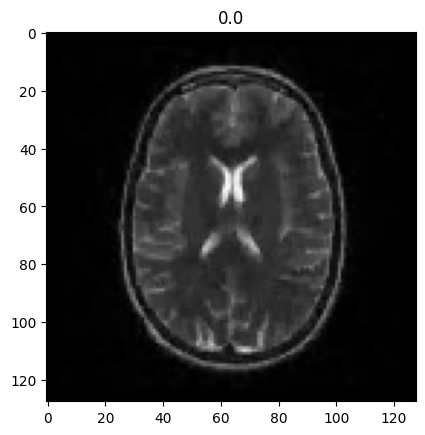

SystemExit: 

In [53]:
index = list(range(len(mri)))
random.shuffle(index)
print(index)
for idx in index:
    sample =  mri[idx]
    img =  sample['image']
    label = sample['label']
    img = img.reshape(img.shape[0],img.shape[1],img.shape[2])
    plt.title(label)
    plt.imshow(img)
    plt.show()
    sys.exit()

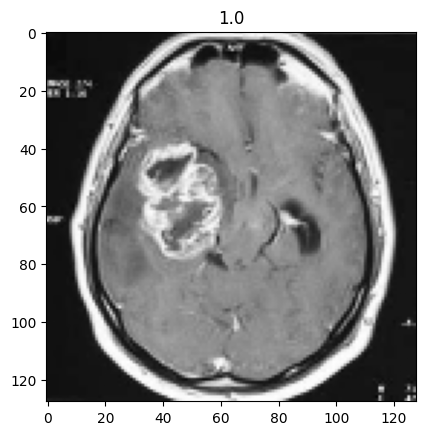

SystemExit: 

In [54]:
#python iter function
it = iter(mri)
for i in range(10):
    sample = next(it)
    img =  sample['image']
    label = sample['label']
    img = img.reshape(img.shape[0],img.shape[1],img.shape[2])
    plt.title(label)
    plt.imshow(img)
    plt.show()
    sys.exit()

#The world with Dataloaders

#Creating a dataloader

Dataloader allows you to iterate through your dataset very easily

also used in shuffleing all data in dataset stored in your object

used to divide data into mini batches




In [55]:
dataloader =  DataLoader(mri, shuffle=True)

torch.Size([128, 128, 3])


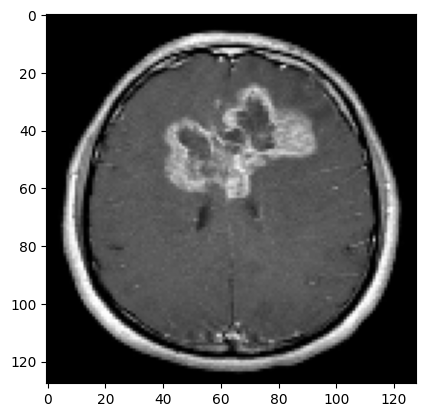

SystemExit: 

In [56]:
for sample in dataloader:
    img = sample['image'].squeeze() # to remove that extra dimension
    print(img.shape)
    img = img.reshape(img.shape[0],img.shape[1],img.shape[2])

    plt.imshow(img)
    plt.show()
    sys.exit()

In [57]:
dataloader =  DataLoader(mri, batch_size = 10, shuffle=True)

In [59]:
for sample in dataloader:
    img = sample['image']
    print(img)
    print(img.shape)

    sys.exit()

tensor([[[[0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          ...,
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0000, 0.0000, 0.0000]],

         [[0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          ...,
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039]],

         [[0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          ...,
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039]],

         ...,

         [[0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          ...,
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0039]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000

SystemExit: 

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
 #  [1, 128, 128, 3], here why 1? we will tell you letter

#create a Model

``` import torch.nn as nn: This imports the neural network module from the PyTorch library. nn provides the building blocks for creating neural network models.


import torch.nn.functional as F: This imports the functional interface of PyTorch's neural network module. It provides functions like activation functions, loss functions, etc.

class CNN(nn.Module):: This defines a Python class named CNN, which inherits from nn.Module. In PyTorch, all neural network models are subclasses of nn.Module. This inheritance allows you to use all the functionalities provided by nn.Module, such as parameter management and GPU utilization.

def __init__(self)::
 This is the constructor method for the CNN class. It initializes the CNN object. The self parameter is a reference to the instance of the class. Inside this method, you typically define the layers and operations of your neural network.


super(CNN, self).__init__(): This line calls the constructor of the parent class (nn.Module) to properly initialize the CNN object.
Inside the constructor, you typically define the layers of your CNN using PyTorch's modules such as nn.Conv2d, nn.MaxPool2d, etc. However, in the provided code snippet, the layers are not defined. You would typically add layers like convolutional layers, pooling layers, and fully connected layers inside the __init__ method.

```

#pooling

In [ ]:
import torch.nn as nn
import torch.nn.functional as f
class CNN(nn.module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_models = nn.sequential(
            nn.Conv2d(in_channels=3, out_channels = 6, kernel_size = 5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2,stride=5)

        )


In [68]:
import numpy as np

# Define the input image
input_image = np.array([[[ 71, 190, 244,   3, 219],
                         [109, 124,   2,  51, 162],
                         [150, 198, 234,  68, 149],
                         [197, 108,  74,  70,  73],
                         [248, 166,  13,  61, 137]],

                        [[ 44, 207,  98,   5,  15],
                         [ 51, 172, 140, 233,  90],
                         [ 78,  24, 155,  41, 124],
                         [249, 112,  50, 140, 171],
                         [121, 245, 199,  54, 133]],

                        [[227, 181, 236, 112, 158],
                         [168, 131, 255,  49, 102],
                         [164, 183, 126, 115,  10],
                         [ 32,  28, 226,  66, 184],
                         [ 98, 150,  75,  44, 220]]])

# Define max pooling parameters
pool_size = 2
stride = 2

# Compute output shape after max pooling
output_shape = (input_image.shape[0],  # Number of channels remains the same
                (input_image.shape[1] - pool_size) // stride + 1,  # Height after pooling
                (input_image.shape[2] - pool_size) // stride + 1)  # Width after pooling

# Apply max pooling operation
output = np.zeros(output_shape)

for i in range(output_shape[0]):  # Loop over channels
    for x in range(output_shape[1]):  # Loop over rows
        for y in range(output_shape[2]):  # Loop over columns
            # Extract window from input image
            window = input_image[i, x * stride:x * stride + pool_size, y * stride:y * stride + pool_size]
            # Apply max pooling
            output[i, x, y] = np.max(window)

print(output)


[[[190. 244.]
  [198. 234.]]

 [[207. 233.]
  [249. 155.]]

 [[227. 255.]
  [183. 226.]]]
